<a href="https://colab.research.google.com/github/WelfLowe/RLAgents/blob/main/Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [120]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [121]:
housing_data = fetch_california_housing()

# Convert the data into a pandas DataFrame
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['Target'] = housing_data.target
print(df.columns)


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')


1. HouseAge: Median house age in the block.
1. AveRooms: Average number of rooms per household.
1. AveBedrms: Average number of bedrooms per household.
1. Population: Block population.
1. AveOccup: Average number of occupants per household.
1. Latitude: Block latitude.
1. Longitude: Block longitude.
1. Target: Median house value (in hundreds of thousands of dollars).

# Process data

## Correlation 
Hitta Korrelation mellan de olika variablerna till target variabeln.

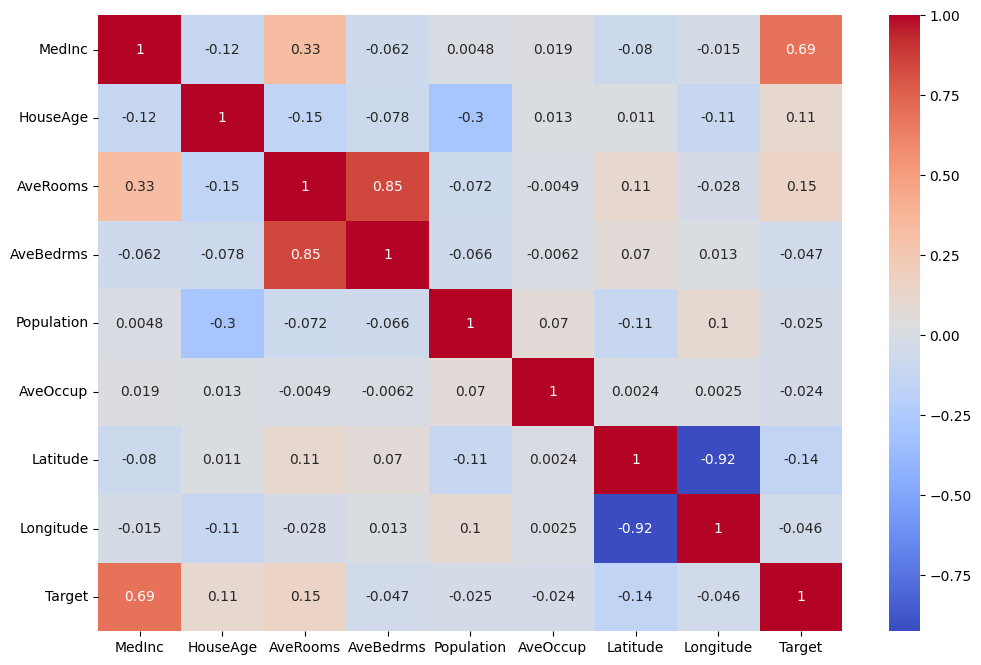

Good correlation variables: ['MedInc', 'HouseAge', 'AveRooms', 'Latitude']


In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

corr_variable = corr_matrix['Target'][(abs(corr_matrix['Target']) > 0.1) & (corr_matrix.index != 'Target')].index.tolist()

print("Good correlation variables:", corr_variable)


## Z-Score Method
Denna metod identifierar och filtrerar bort Outliers baserat på deras avvikelse från medelvärdet.
Z-Score beräknas som (värde - medelvärde) / standardavvikelse.
Vi använder 3 som standardgräns
 
 https://en.wikipedia.org/wiki/Standard_score

 Går också att använda typ IQR


In [123]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df))
df_normalized = df[(z_scores < 3).all(axis=1)]

# Train/Test

In [124]:
X = df_normalized[corr_variable]
Y = df_normalized['Target']

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(15835, 4)
(3959, 4)
(15835,)
(3959,)


In [126]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [127]:
# model evaluation for training set
y_train_predict = lr_model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lr_model.predict(X_test)
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 0.608263555317202
R2 score is 0.5056334270523178


The model performance for testing set
--------------------------------------
MSE is 0.5788005588824576
R2 score is 0.5221046928174127


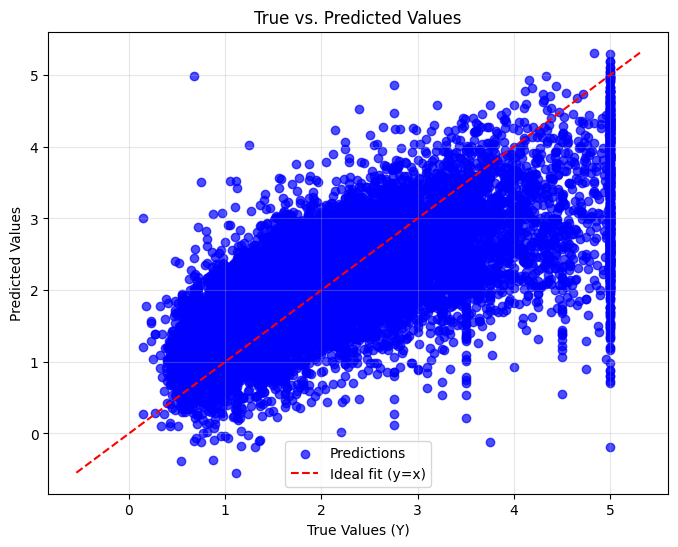

In [128]:
Y_train, y_train_predict

plt.figure(figsize=(8, 6))
plt.scatter(Y_train, y_train_predict, color='blue', alpha=0.7, label='Predictions')

# Add a reference line (y=x) for perfect predictions
min_val = min(min(Y_train), min(y_train_predict))
max_val = max(max(Y_train), max(y_train_predict))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal fit (y=x)')

# Plot aesthetics
plt.xlabel("True Values (Y)")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
